<a href="https://colab.research.google.com/github/sophia-na/CSCI-310-Project-2/blob/master/Food_Delivery_Time_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("denkuznetz/food-delivery-time-prediction")

print("Path to dataset files:", path)

100%|██████████| 11.6k/11.6k [00:00<00:00, 12.3MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/denkuznetz/food-delivery-time-prediction/versions/1


In [ ]:
import pandas as pd
import kagglehub

# Download dataset
path = kagglehub.dataset_download("denkuznetz/food-delivery-time-prediction")

print("Path to dataset files:", path)

# Load CSV (adjust filename if different)
df = pd.read_csv(f"{path}/Food_Delivery_Times.csv")

# Show first few rows
print(df.head())


Path to dataset files: /kaggle/input/food-delivery-time-prediction
   Order_ID  Distance_km Weather Traffic_Level Time_of_Day Vehicle_Type  \
0       522         7.93   Windy           Low   Afternoon      Scooter   
1       738        16.42   Clear        Medium     Evening         Bike   
2       741         9.52   Foggy           Low       Night      Scooter   
3       661         7.44   Rainy        Medium   Afternoon      Scooter   
4       412        19.03   Clear           Low     Morning         Bike   

   Preparation_Time_min  Courier_Experience_yrs  Delivery_Time_min  
0                    12                     1.0                 43  
1                    20                     2.0                 84  
2                    28                     1.0                 59  
3                     5                     1.0                 37  
4                    16                     5.0                 68  


In [ ]:
import pandas as pd
!pip install catboost
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from catboost import CatBoostRegressor
import numpy as np


# Load dataset (update path accordingly)
df = pd.read_csv(f"{path}/Food_Delivery_Times.csv")

print(df.columns)
df.info()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 5.6 MB/s eta 0:00:00
Index(['Order_ID', 'Distance_km', 'Weather', 'Traffic_Level', 'Time_of_Day',
       'Vehicle_Type', 'Preparation_Time_min', 'Courier_Experience_yrs',
       'Delivery_Time_min'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 970 non-null    object 
 3   Traffic_Level           970 non-null    object 
 4   Time_of_Day             970 non-null    object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  970 non-null    float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), obj

In [ ]:
print(f'Number of duplicates in this dataset: {df.duplicated().sum()}')


Number of duplicates in this dataset: 0


In [ ]:
for i in df:
    if df[i].isnull().sum()>0:
        print(f'{i} has: {df[i].isnull().sum()} missing values')

Weather has: 30 missing values
Traffic_Level has: 30 missing values
Time_of_Day has: 30 missing values
Courier_Experience_yrs has: 30 missing values


In [ ]:
df['Weather'] = df['Weather'].fillna(df['Weather'].mode()[0])
df['Traffic_Level'] = df['Traffic_Level'].fillna(df['Traffic_Level'].mode()[0])
df['Time_of_Day'] = df['Time_of_Day'].fillna(df['Time_of_Day'].mode()[0])

df['Courier_Experience_yrs'] = df['Courier_Experience_yrs'].fillna(df['Courier_Experience_yrs'].median())

In [ ]:
df.isnull().sum()

,0
Order_ID,0
Distance_km,0
Weather,0
Traffic_Level,0
Time_of_Day,0
Vehicle_Type,0
Preparation_Time_min,0
Courier_Experience_yrs,0
Delivery_Time_min,0


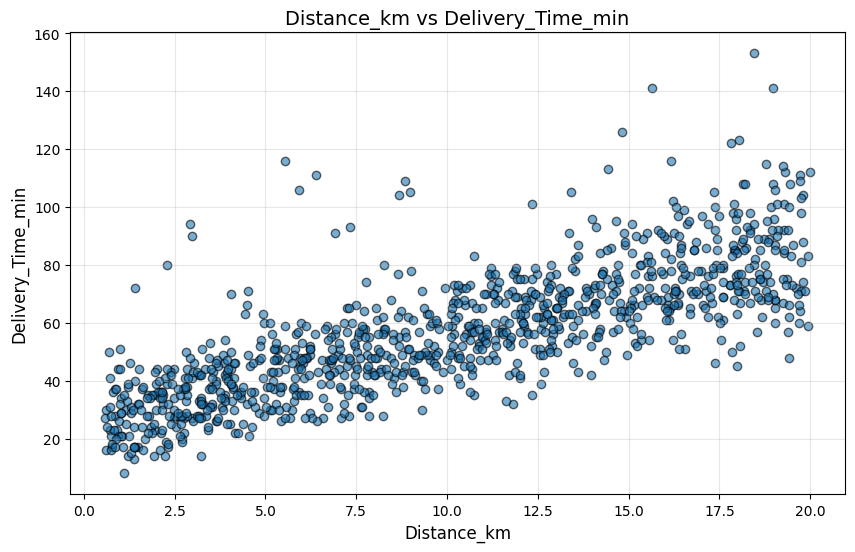

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(df["Distance_km"], df["Delivery_Time_min"], alpha=0.6, edgecolor='k')
plt.title("Distance_km vs Delivery_Time_min", fontsize=14)
plt.xlabel("Distance_km", fontsize=12)
plt.ylabel("Delivery_Time_min", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

/tmp/ipython-input-882809612.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Traffic_Level', y='Delivery_Time_min', data=df, errorbar=None,palette="Set2" )


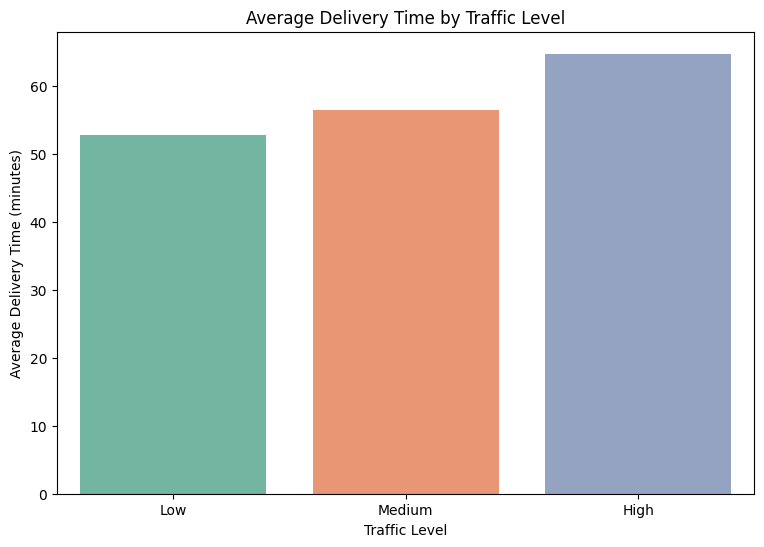

In [ ]:
import seaborn as sns
plt.figure(figsize=(9, 6))
sns.barplot(x='Traffic_Level', y='Delivery_Time_min', data=df, errorbar=None,palette="Set2" )
plt.title("Average Delivery Time by Traffic Level")
plt.xlabel("Traffic Level")
plt.ylabel("Average Delivery Time (minutes)")
plt.show()


/tmp/ipython-input-1468562980.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Courier_Experience_yrs', y='Delivery_Time_min', data=df,palette="Set2" )


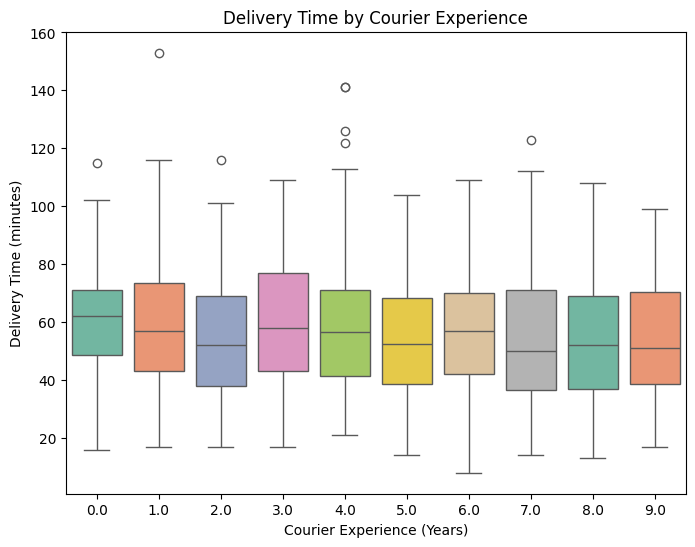

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Courier_Experience_yrs', y='Delivery_Time_min', data=df,palette="Set2" )
plt.title("Delivery Time by Courier Experience")
plt.xlabel("Courier Experience (Years)")
plt.ylabel("Delivery Time (minutes)")
plt.show()


/tmp/ipython-input-2656018461.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Vehicle Type', loc='center left', bbox_to_anchor=(1, 0.5))


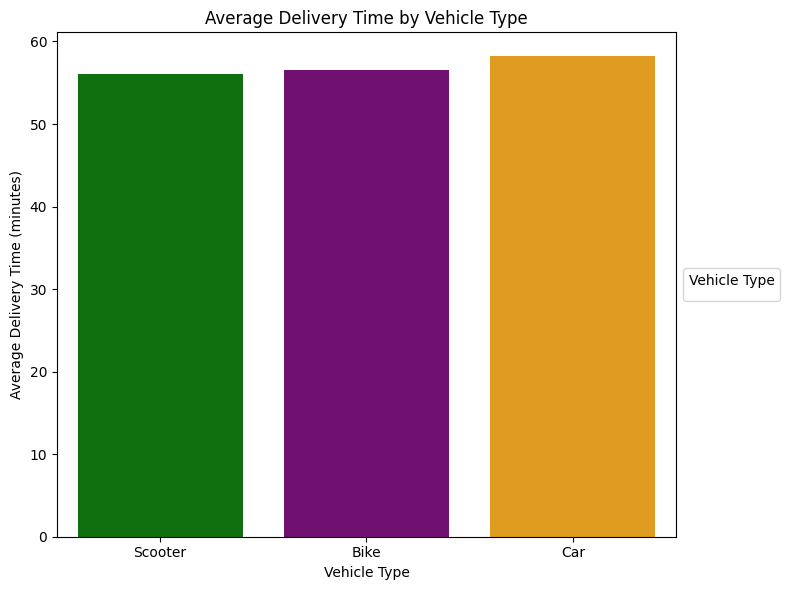

In [ ]:


plt.figure(figsize=(8, 6))

sns.barplot(
    x='Vehicle_Type',
    y='Delivery_Time_min',
    data=df,
    errorbar=None,
    hue='Vehicle_Type',
    palette={'Scooter': "green", 'Bike': "purple", 'Car': 'orange'}
)

# Titles and labels
plt.title("Average Delivery Time by Vehicle Type")
plt.xlabel("Vehicle Type")
plt.ylabel("Average Delivery Time (minutes)")

# Move legend outside the plot on the right
plt.legend(title='Vehicle Type', loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


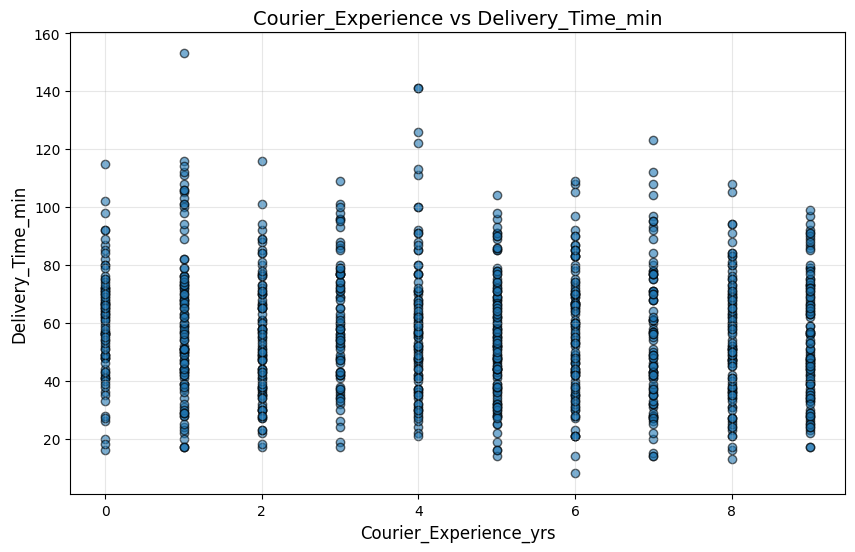

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df["Courier_Experience_yrs"], df["Delivery_Time_min"], alpha=0.6, edgecolor='k')
plt.title("Courier_Experience vs Delivery_Time_min", fontsize=14)
plt.xlabel("Courier_Experience_yrs", fontsize=12)
plt.ylabel("Delivery_Time_min", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

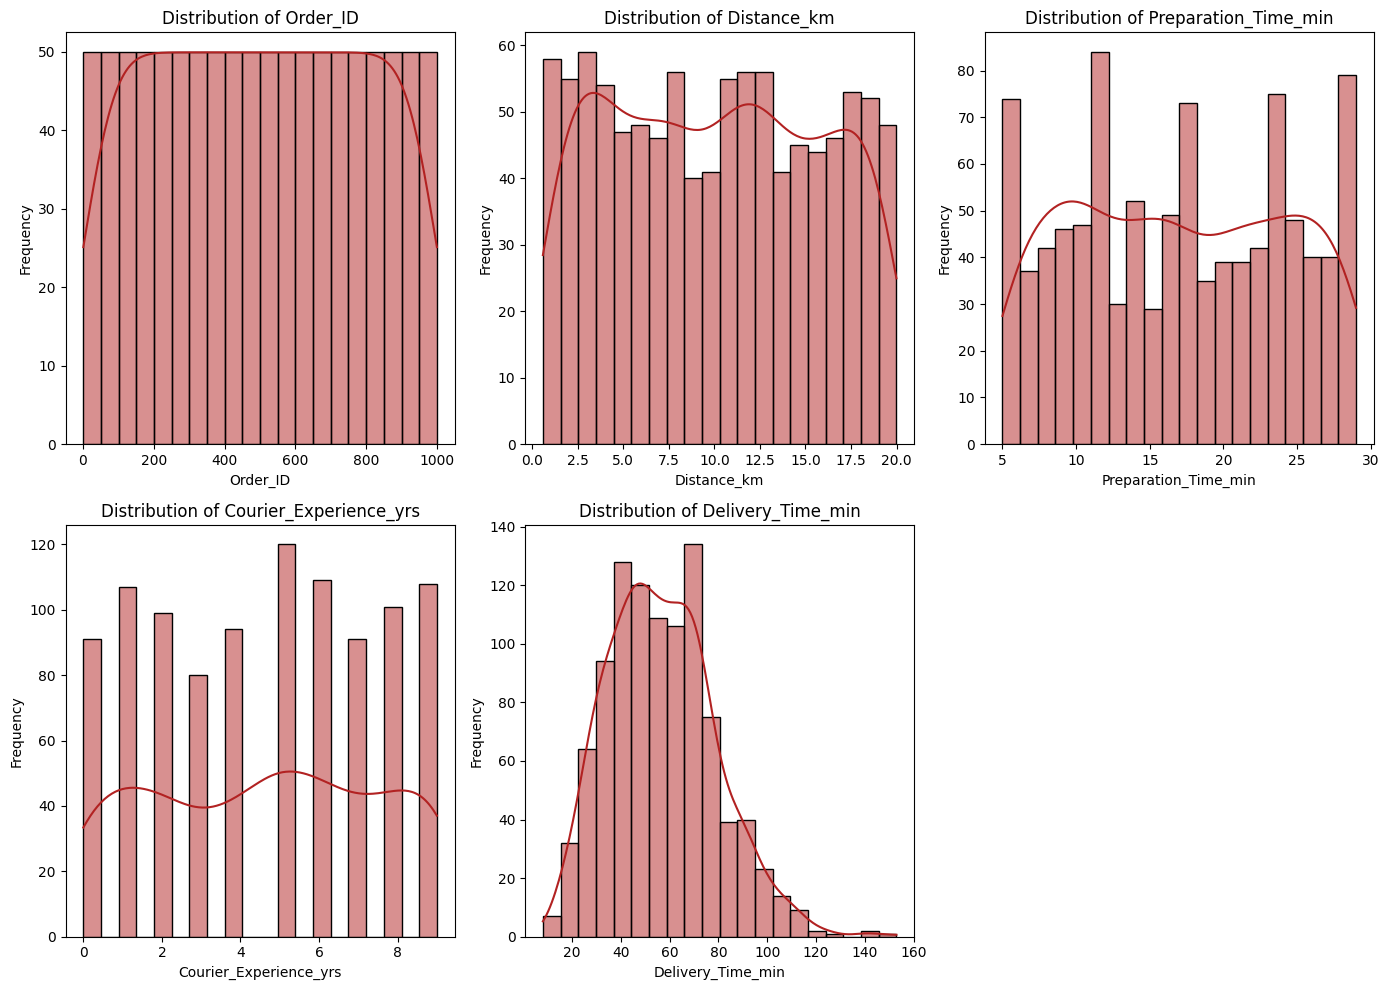

In [ ]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(14, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols) // 3 + 1, 3, i)
    sns.histplot(df[col], kde=True, bins=20, color='firebrick')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

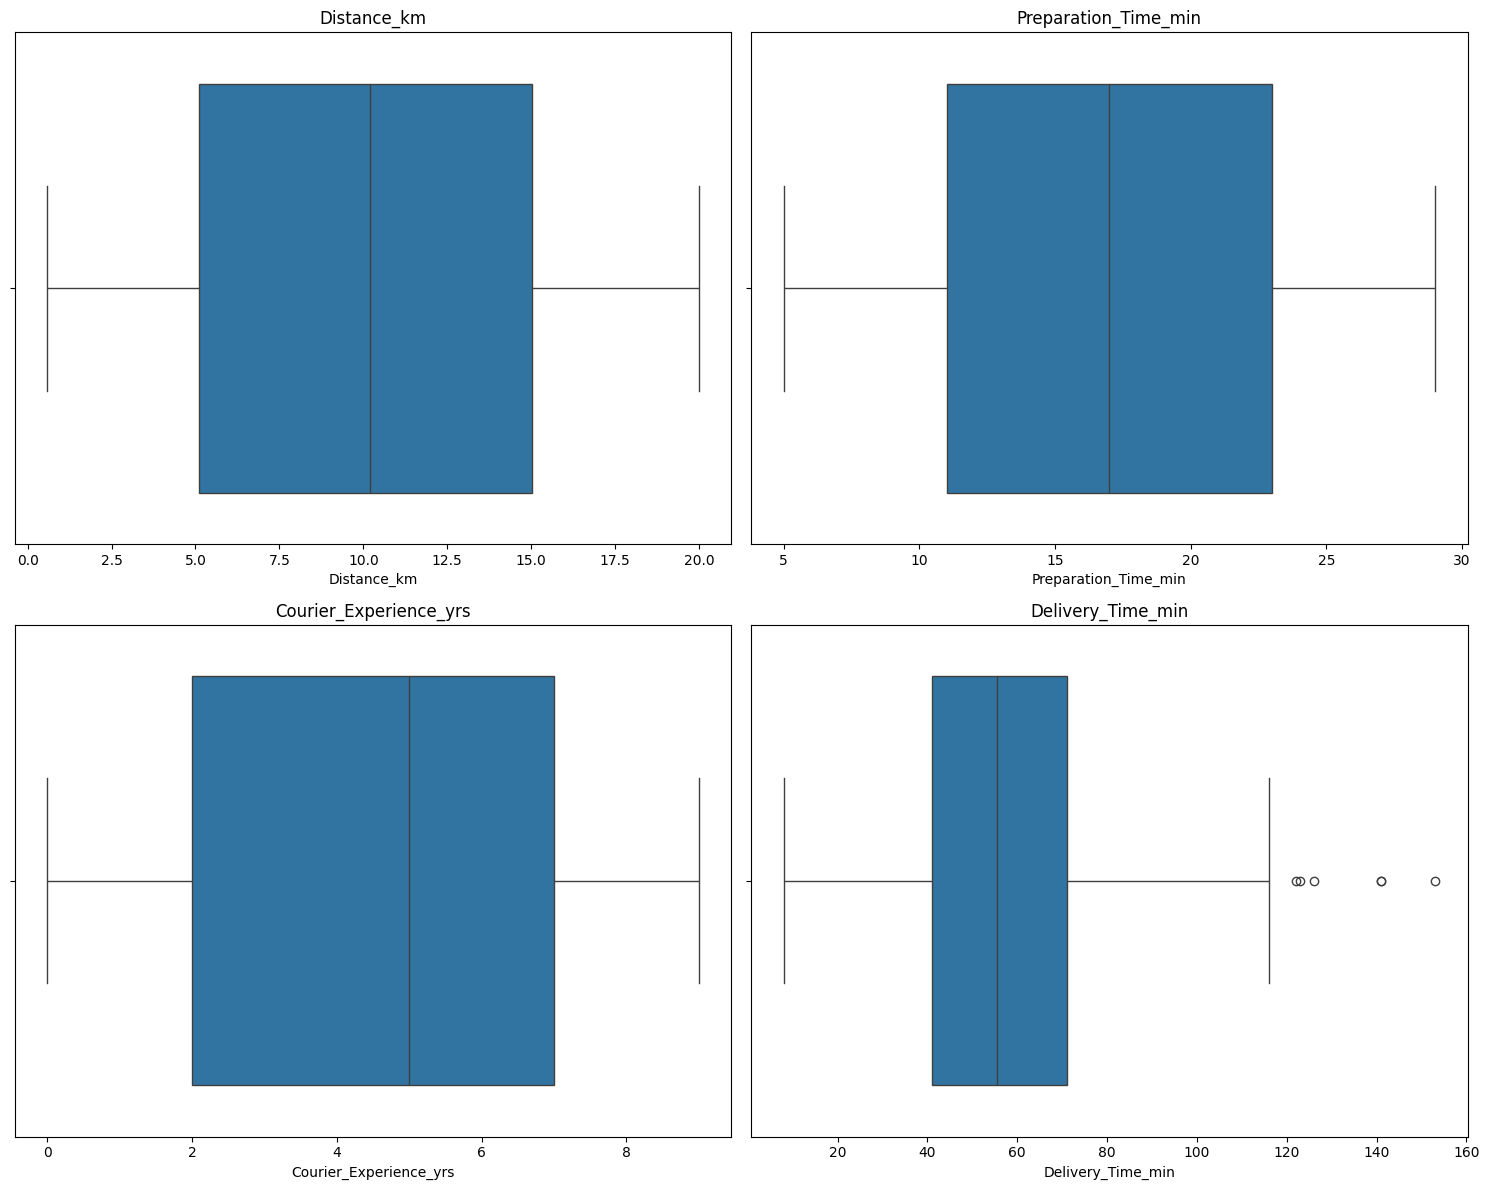

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

sns.boxplot(x=df['Distance_km'], ax=axes[0, 0])
axes[0, 0].set_title('Distance_km')

sns.boxplot(x=df['Preparation_Time_min'], ax=axes[0, 1])
axes[0, 1].set_title('Preparation_Time_min')

sns.boxplot(x=df['Courier_Experience_yrs'], ax=axes[1, 0])
axes[1, 0].set_title('Courier_Experience_yrs')

sns.boxplot(x=df['Delivery_Time_min'], ax=axes[1, 1])
axes[1, 1].set_title('Delivery_Time_min')

plt.tight_layout()
plt.show()

                        Order_ID  Distance_km  Preparation_Time_min  \
Order_ID                1.000000    -0.023792             -0.035362   
Distance_km            -0.023792     1.000000             -0.009025   
Preparation_Time_min   -0.035362    -0.009025              1.000000   
Courier_Experience_yrs  0.012912    -0.005951             -0.031124   
Delivery_Time_min      -0.033831     0.816535              0.305535   

                        Courier_Experience_yrs  Delivery_Time_min  
Order_ID                              0.012912          -0.033831  
Distance_km                          -0.005951           0.816535  
Preparation_Time_min                 -0.031124           0.305535  
Courier_Experience_yrs                1.000000          -0.085540  
Delivery_Time_min                    -0.085540           1.000000  


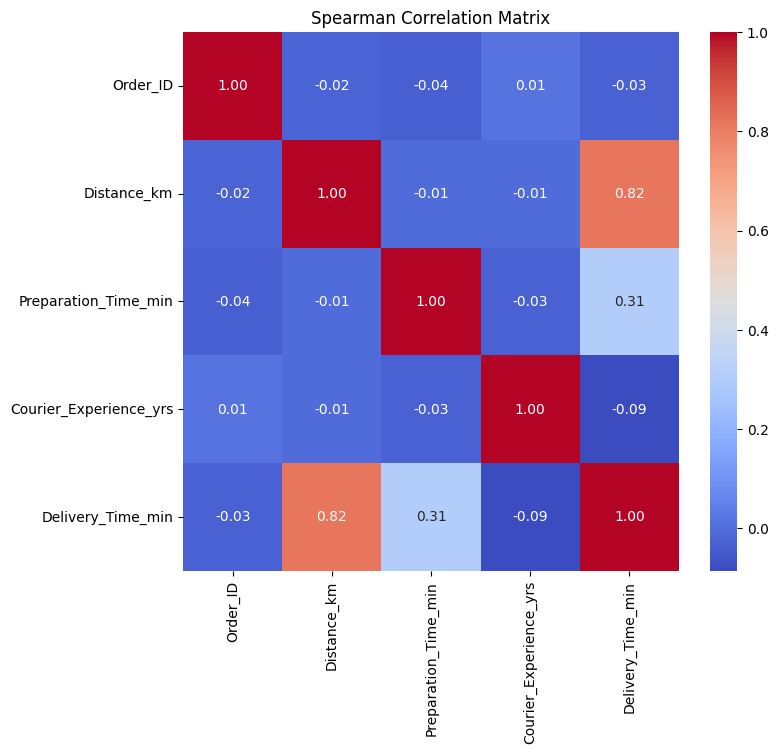

In [ ]:
numeric_df = df.select_dtypes(include=['number'])
spearman_corr = numeric_df.corr(method='spearman')

# Выводим матрицу корреляции
print(spearman_corr)

# Построение тепловой карты для визуализации матрицы корреляции
plt.figure(figsize=(8, 7))
sns.heatmap(spearman_corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Spearman Correlation Matrix')
plt.show()

In [ ]:
df = pd.get_dummies(df, columns=['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type'], drop_first=True)

In [ ]:
df.head()

,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min,Weather_Foggy,Weather_Rainy,Weather_Snowy,Weather_Windy,Traffic_Level_Low,Traffic_Level_Medium,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Vehicle_Type_Car,Vehicle_Type_Scooter
0,522,7.93,12,1.0,43,False,False,False,True,True,False,False,False,False,False,True
1,738,16.42,20,2.0,84,False,False,False,False,False,True,True,False,False,False,False
2,741,9.52,28,1.0,59,True,False,False,False,True,False,False,False,True,False,True
3,661,7.44,5,1.0,37,False,True,False,False,False,True,False,False,False,False,True
4,412,19.03,16,5.0,68,False,False,False,False,True,False,False,True,False,False,False


In [ ]:
df.shape

(1000, 16)

In [ ]:
X = df.drop(['Order_ID', 'Delivery_Time_min'], axis = 1)
y = df['Delivery_Time_min']

In [ ]:
# splitting your dataset into training and testing sets using a 70/30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=250)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', eval_metric='mae')

# Запишем необходимые нам параметры для дальнейшего перебора.
param_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.2],
    'max_depth': [3, 5, 10],
    'subsample': [0.8, 1.0],
    'min_child_weight': [1, 3, 5]
}

#Let's perform a grid search over the parameters defined above, splitting the dataset into 5 folds.
grid_search__xgb = GridSearchCV(xgb_regressor, param_xgb, cv=5)

# "Let's train the model on the training data."
grid_search__xgb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric='mae',
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=Non...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'learning_rate': [0.1, 0.2], 'max_depth': [3, 5, 10],
                         'min_child_weight': [1, 3, 5],
                         'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 1.0]})

In [ ]:
grid_search__xgb.best_params_


{'learning_rate': 0.1,
 'max_depth': 3,
 'min_child_weight': 3,
 'n_estimators': 50,
 'subsample': 0.8}

In [ ]:
best_gs_xgb_two = grid_search__xgb.best_estimator_


In [ ]:
from sklearn.metrics import r2_score

y_test_pred1 = best_gs_xgb_two.predict(X_test)
mae_test = mean_absolute_error(y_test, y_test_pred1)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred1))
r2_test = r2_score(y_test, y_test_pred1)

print('Score on train data = ', round(best_gs_xgb_two.score(X_train, y_train), 4))
print('Score on test data = ', round(best_gs_xgb_two.score(X_test, y_test), 4))
print('MAE on test data =', round(mae_test, 4))
print(f"Train R² Score: {best_gs_xgb_two.score(X_train, y_train):.4f}")
print(f"Test R² Score: {r2_test:.4f}")
print("RMSE on test data =", round(rmse_test, 4))

Score on train data =  0.8036
Score on test data =  0.8003
MAE on test data = 6.7233
Train R² Score: 0.8036
Test R² Score: 0.8003
RMSE on test data = 9.5538


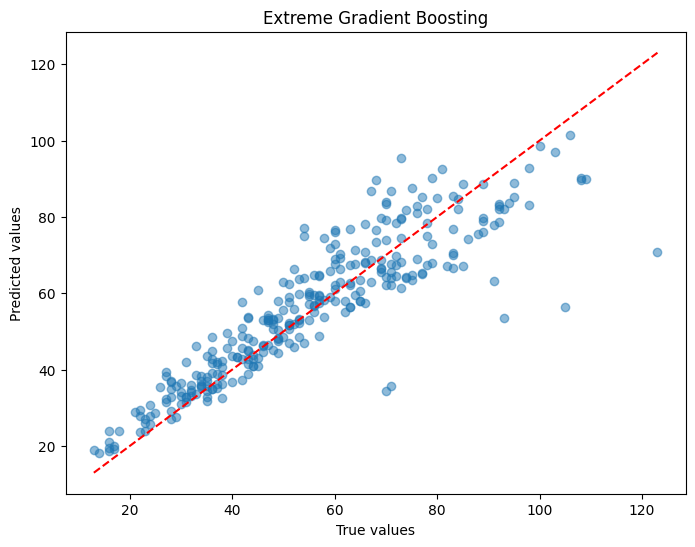

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred1, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('Extreme Gradient Boosting')
plt.show()

In [ ]:
import lightgbm as lgb

lgb_regressor = lgb.LGBMRegressor(objective='regression', metric='mae', verbose=-1)

param_lgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 10],
    'num_leaves': [31, 50, 100],
    'subsample': [0.8, 1.0],
    'min_child_weight': [1, 3, 5],
}

grid_search_lgb = GridSearchCV(lgb_regressor, param_lgb, cv=5, scoring='neg_mean_absolute_error')

grid_search_lgb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LGBMRegressor(metric='mae', objective='regression',
                                     verbose=-1),
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [3, 5, 10], 'min_child_weight': [1, 3, 5],
                         'n_estimators': [50, 100, 200],
                         'num_leaves': [31, 50, 100], 'subsample': [0.8, 1.0]},
             scoring='neg_mean_absolute_error')

In [ ]:
print('Best params:', grid_search_lgb.best_params_)


Best params: {'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 200, 'num_leaves': 31, 'subsample': 0.8}


In [ ]:
best_lgb = grid_search_lgb.best_estimator_


In [ ]:
y_test_pred2 = best_lgb.predict(X_test)
mae_test = mean_absolute_error(y_test, y_test_pred2)

print('Score on train data:', round(best_lgb.score(X_train, y_train), 4))
print('Score on test data:', round(best_lgb.score(X_test, y_test), 4))
print('MAE on test data:', round(mae_test, 4))

# y_test_pred2 = best_lgb.predict(X_test)
# mae_test = mean_absolute_error(y_test, y_test_pred2)
# rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred2))
# r2_test = r2_score(y_test, y_test_pred2)

# print('Score on train data = ', round(best_gs_xgb_two.score(X_train, y_train), 4))
# print('Score on test data = ', round(best_gs_xgb_two.score(X_test, y_test), 4))
# print('MAE on test data =', round(mae_test, 4))
# print(f"Train R² Score: {best_gs_xgb_two.score(X_train, y_train):.4f}")
# print(f"Test R² Score: {r2_test:.4f}")
# print("RMSE on test data =", round(rmse_test, 4))

Score on train data: 0.817
Score on test data: 0.792
MAE on test data: 6.7521


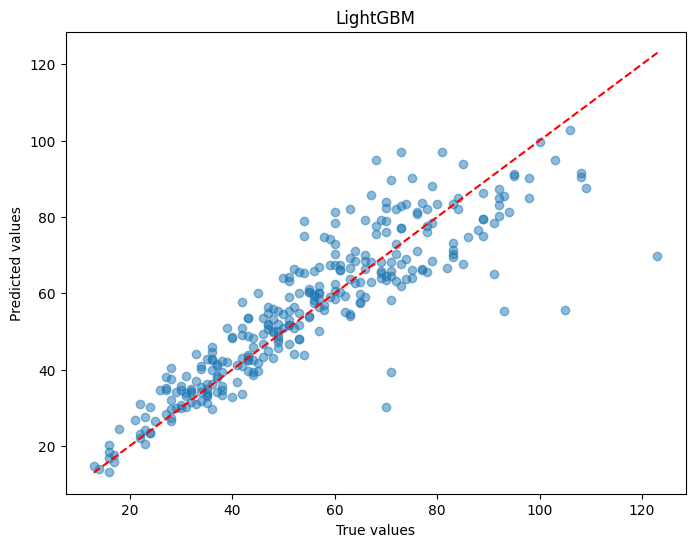

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred2, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('LightGBM')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop(['Order_ID', 'Delivery_Time_min'], axis=1)
y = df['Delivery_Time_min']


In [ ]:
# First split: 85% train+val, 15% test
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Second split: from the 85%, take ~17.6% for validation (which is 15% of total)
X_train, X_valid, y_train, y_valid = train_test_split(X_temp, y_temp, test_size=0.176, random_state=42)


In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', eval_metric='mae')

param_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.2],
    'max_depth': [3, 5, 10],
    'subsample': [0.8, 1.0],
    'min_child_weight': [1, 3, 5]
}

grid_search__xgb = GridSearchCV(xgb_regressor, param_xgb, cv=5)
grid_search__xgb.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric='mae',
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=Non...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'learning_rate': [0.1, 0.2], 'max_depth': [3, 5, 10],
                         'min_child_weight': [1, 3, 5],
                         'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 1.0]})

In [ ]:
best_model = grid_search__xgb.best_estimator_

# Validation performance
val_preds = best_model.predict(X_valid)
print("Validation MAE:", mean_absolute_error(y_valid, val_preds))

# Final test performance
test_preds = best_model.predict(X_test)
print("Test MAE:", mean_absolute_error(y_test, test_preds))


Validation MAE: 6.429078578948975
Test MAE: 6.872483730316162


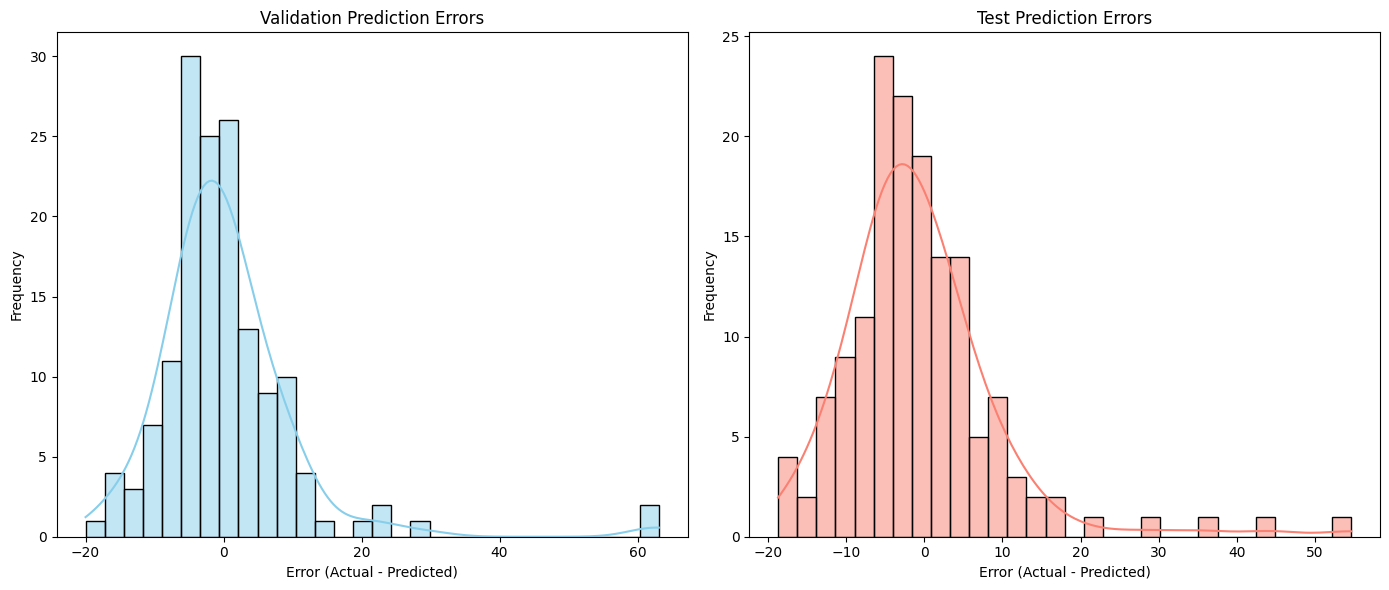

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate prediction errors
val_errors = y_valid - val_preds
test_errors = y_test - test_preds

# Set up the plot
plt.figure(figsize=(14, 6))

# Validation error distribution
plt.subplot(1, 2, 1)
sns.histplot(val_errors, kde=True, color='skyblue', bins=30)
plt.title('Validation Prediction Errors')
plt.xlabel('Error (Actual - Predicted)')
plt.ylabel('Frequency')

# Test error distribution
plt.subplot(1, 2, 2)
sns.histplot(test_errors, kde=True, color='salmon', bins=30)
plt.title('Test Prediction Errors')
plt.xlabel('Error (Actual - Predicted)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [ ]:
# random forest

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score


# 🎯 Sample dataset
# Let's create a synthetic dataset
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # Feature: 100 samples from 0 to 10
y = 2.5 * X.squeeze() + np.random.randn(100) * 2  # Target with noise

# 🧹 Split into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# splitting your dataset into training and testing sets using a 70/30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=250)

# 🌲 Create and train the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 📈 Make predictions
y_pred = model.predict(X_test)


# 📊 Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse:.3f}")

# Calculate R² score
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.3f}")

# 🔍 Optional: Feature importance
print("Feature importances:", model.feature_importances_)


Mean Squared Error: 4.52
Root Mean Squared Error: 2.125
R² Score: 0.915
Feature importances: [1.]


In [ ]:
# 🌟 Gradient Boosting Regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

# 🎯 Sample dataset
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # Feature: 100 samples from 0 to 10
y = 2.5 * X.squeeze() + np.random.randn(100) * 2  # Target with noise

# 🧹 Split into training and testing sets (70/30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=250)

# 🔥 Create and train the Gradient Boosting Regressor
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

# 📈 Make predictions
y_pred = model.predict(X_test)

# 📊 Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.3f}")
print(f"R² Score: {r2:.3f}")

# 🔍 Optional: Feature importance
print("Feature importances:", model.feature_importances_)


Mean Squared Error: 4.73
Root Mean Squared Error: 2.174
R² Score: 0.911
Feature importances: [1.]
